Idea: For $H_{K_1} \subset H_{K_2}$, there needs to exist $\gamma$ such that $\gamma K_1 - K_2$ is positive definite.

* Generate a random $n$, $c = [c_1, \ldots, c_n]^\top$ and $x = [x_1, \ldots, x_n]^\top$ and check if $c^\top [\gamma K_1(x,x) - K_2(x,x)] c \geq 0$ (slight abuse of notation, here we mean the Gram matrix).
* Try multiple times for a given $\gamma$, calculate number of proportions it's positive definite.  If $H_{K_1} \subset H_{K_2}$, we should be able to find $\gamma$ so that the proportion is always 1.

In [66]:
from utils import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF, Matern
import pandas as pd
from copy import deepcopy

import sklearn

In [137]:
l1 = 1.0
l2 = 2.0

k1 = RBF(length_scale=l1)
k2 = RBF(length_scale=l2)
#k2 = Matern(length_scale=l1, nu=0.5)

In [138]:
def is_pd(K):
    try:
        np.linalg.cholesky(K)
        return 1
    except np.linalg.linalg.LinAlgError as err:
        return 0
        # if 'Matrix is not positive definite' in err.message:
        #     return err.message
        # else:
        #     raise


In [147]:
gamma_list = np.linspace(1.5,1.75,num=100)

p_list = []

N = len(gamma_list)
i = 0

J = 100

n_max = 100

for gamma in gamma_list:
    pos = 0.0
    for j in range(J):
        D = 10
        n = np.random.randint(50,n_max,size=1)[0]

        x = np.random.randint(0,100,(n,D))

        x_norm = sklearn.preprocessing.normalize(x)

        K1 = k1(x_norm)
        K2 = k2(x_norm)

        inside = gamma*K1 - K2



        pos += is_pd(inside)

    p_list.append(pos/J)

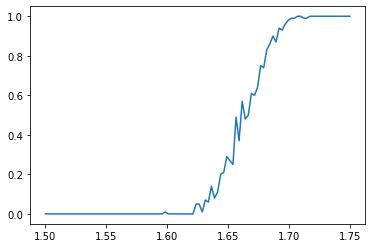

In [148]:
plt.plot(gamma_list, p_list)